In [1]:
import sys
from pathlib import Path

# Add src directory to Python path
project_root = Path.cwd().parent
src_path = project_root / "src"
if str(src_path) not in sys.path:
    sys.path.insert(0, str(src_path))
    print(f"Added {src_path} to Python path")

Added /Users/cooper/Desktop/hydro-forecasting/src to Python path


In [2]:
import logging

logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(name)s - %(levelname)s - %(message)s",
)

from hydro_forecasting.experiment_utils.seed_manager import SeedManager  # noqa: E402

seed_manager = SeedManager(42)
seed_manager.set_global_seeds()

import matplotlib.pyplot as plt  # noqa: E402
import numpy as np  # noqa: E402
import seaborn as sns  # noqa: E402
import pandas as pd  # noqa: E402

2025-06-25 16:31:03,950 - hydro_forecasting.experiment_utils.seed_manager - INFO - SeedManager initialized with master seed: 42
2025-06-25 16:31:03,951 - lightning_fabric.utilities.seed - INFO - Seed set to 42


In [3]:
from hydro_forecasting.data.caravanify_parquet import (
    CaravanifyParquet,
    CaravanifyParquetConfig,
)

In [4]:
configs = CaravanifyParquetConfig(
    attributes_dir="/Users/cooper/Desktop/CaravanifyParquet/CA/post_processed/attributes",
    timeseries_dir="/Users/cooper/Desktop/CaravanifyParquet/CA/post_processed/timeseries/csv",
    gauge_id_prefix="CA",
    use_hydroatlas_attributes=True,
    use_caravan_attributes=True,
    use_other_attributes=True,
)

caravan = CaravanifyParquet(configs)
ca_basins = caravan.get_all_gauge_ids()
caravan.load_stations(ca_basins)
static_data = caravan.get_static_attributes()
ts_data = caravan.get_time_series()

ts_data = ts_data.merge(static_data[["gauge_id", "country"]], on="gauge_id", how="left")
ts_data["month"] = ts_data["date"].dt.month

In [5]:
sns.set_context("paper", font_scale=1.3)

In [6]:
# monthly_medians = (
#     ts_data.groupby(["gauge_id", "country", "month"])
#     .agg(
#         {
#             "streamflow": "median",
#             "total_precipitation_sum": "median",
#             "temperature_2m_mean": "median",
#             "potential_evaporation_sum_FAO_PENMAN_MONTEITH": "median",
#         }
#     )
#     .reset_index()
# )

# palette = ["#FBBF24", "#8B5CF6"]

# # Set the figure size for better visibility - increased height for 4 subplots
# fig, axes = plt.subplots(4, 1, figsize=(10, 12))

# # Create boxplot for temperature (first)
# temp_plot = sns.boxplot(
#     x="month", y="temperature_2m_mean", hue="country", data=monthly_medians, palette=palette, ax=axes[0], legend=False
# )
# # Set alpha for all patch elements after plotting
# for patch in temp_plot.artists:
#     patch.set_alpha(0.8)

# axes[0].set_xlabel("")
# axes[0].set_ylabel("Median Temperature (°C)")
# axes[0].set_xticks(np.arange(0, 12))
# axes[0].set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
# axes[0].grid(True, linestyle="-", alpha=0.3)

# # Create boxplot for precipitation (second)
# precip_plot = sns.boxplot(
#     x="month",
#     y="total_precipitation_sum",
#     hue="country",
#     data=monthly_medians,
#     palette=palette,
#     ax=axes[1],
#     legend=False,
# )
# # Set alpha for all patch elements after plotting
# for patch in precip_plot.artists:
#     patch.set_alpha(0.8)

# axes[1].set_xlabel("")
# axes[1].set_ylabel("Median Precipitation (mm/d)")
# axes[1].set_xticks(np.arange(0, 12))
# axes[1].set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
# axes[1].grid(True, linestyle="-", alpha=0.3)

# # Create boxplot for PET (third)
# pet_plot = sns.boxplot(
#     x="month",
#     y="potential_evaporation_sum_FAO_PENMAN_MONTEITH",
#     hue="country",
#     data=monthly_medians,
#     palette=palette,
#     ax=axes[2],
#     legend=False,
# )
# # Set alpha for all patch elements after plotting
# for patch in pet_plot.artists:
#     patch.set_alpha(0.8)

# axes[2].set_xlabel("")
# axes[2].set_ylabel("Median PET (mm/d)")
# axes[2].set_xticks(np.arange(0, 12))
# axes[2].set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
# axes[2].grid(True, linestyle="-", alpha=0.3)

# # Create boxplot for streamflow (fourth)
# streamflow_plot = sns.boxplot(
#     x="month", y="streamflow", hue="country", data=monthly_medians, palette=palette, ax=axes[3]
# )
# # Set alpha for all patch elements after plotting
# for patch in streamflow_plot.artists:
#     patch.set_alpha(0.8)

# axes[3].set_xlabel("")
# axes[3].set_ylabel("Median Streamflow (mm/d)")
# axes[3].set_xticks(np.arange(0, 12))
# axes[3].set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
# axes[3].grid(True, linestyle="-", alpha=0.3)

# # Get the legend from the last plot and place it at the bottom
# handles, labels = axes[3].get_legend_handles_labels()
# axes[3].get_legend().remove()

# # Add a single legend at the bottom of the figure
# fig.legend(handles, labels, loc="lower center", ncol=len(labels), bbox_to_anchor=(0.5, 0.01))

# # Adjust spacing to make room for the legend at the bottom
# plt.tight_layout(rect=[0, 0.05, 1, 1])
# sns.despine()

# path_to_save = "/Users/cooper/Desktop/CAMELS-CH/images/CA_climate/climate_boxplots_ordered_with_PET.png"
# plt.savefig(path_to_save, dpi=300, bbox_inches="tight")

# plt.show()

2025-06-25 16:31:04,874 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-06-25 16:31:04,877 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-06-25 16:31:04,995 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-06-25 16:31:04,998 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-06-25 16:31:05,

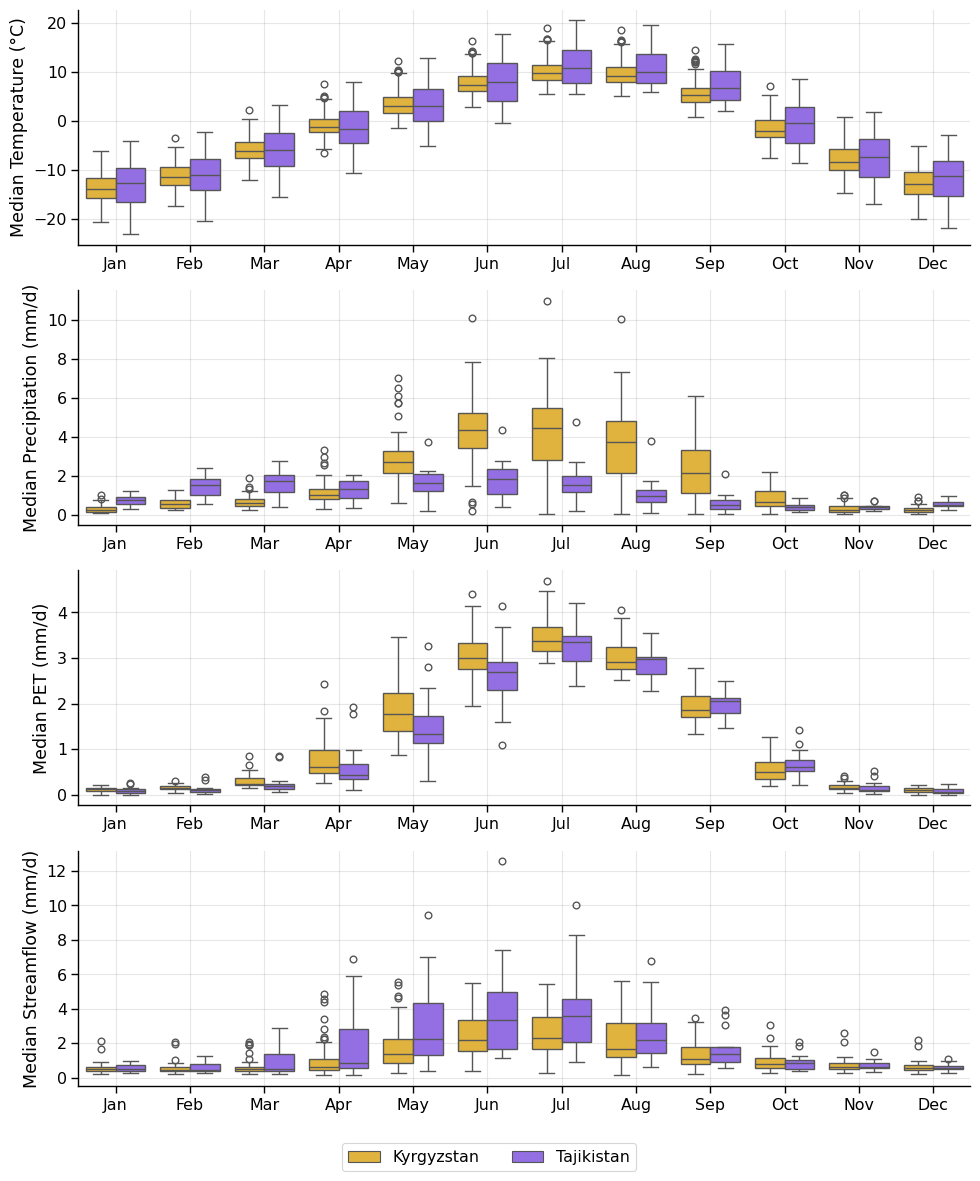

In [7]:
def create_climate_boxplots(
    ts_data: pd.DataFrame,
    variables_config: dict[str, str],
    palette: list[str] | None = None,
    figsize: tuple[int, int] = (10, 12),
    save_path: str | None = None,
) -> None:
    """
    Create boxplots for multiple climate variables.

    Args:
        ts_data: Time series dataframe containing climate data.
        variables_config: Dict with variable names as keys and plot labels as
            values. Example: {
                "temperature_2m_mean": "Median Temperature (°C)",
                "total_precipitation_sum": "Median Precipitation (mm/d)",
                "streamflow": "Median Streamflow (mm/d)"
            }
        palette: Color palette for countries. Defaults to None.
        figsize: Figure size (width, height). Defaults to (10, 12).
        save_path: Optional path to save the figure. Defaults to None.
    """
    if palette is None:
        palette = ["#FBBF24", "#8B5CF6"]

    # Get list of variables to aggregate
    variables = list(variables_config.keys())

    # Create aggregation dict (all using median)
    agg_dict = dict.fromkeys(variables, "median")

    # Aggregate the data
    monthly_medians = ts_data.groupby(["gauge_id", "country", "month"]).agg(agg_dict).reset_index()

    # Create subplots
    n_plots = len(variables)
    fig, axes = plt.subplots(n_plots, 1, figsize=figsize)
    if n_plots == 1:
        axes = [axes]

    # Month labels
    month_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

    # Create each boxplot
    for i, (var, ylabel) in enumerate(variables_config.items()):
        # Create boxplot
        plot = sns.boxplot(
            x="month",
            y=var,
            hue="country",
            data=monthly_medians,
            palette=palette,
            ax=axes[i],
            legend=False if i < n_plots - 1 else True,
        )

        # Set alpha for patches
        for patch in plot.artists:
            patch.set_alpha(0.8)

        # Customize axes
        axes[i].set_xlabel("")
        axes[i].set_ylabel(ylabel)
        axes[i].set_xticks(np.arange(0, 12))
        axes[i].set_xticklabels(month_labels)
        axes[i].grid(True, linestyle="-", alpha=0.3)

    # Handle legend
    handles, labels = axes[-1].get_legend_handles_labels()
    if axes[-1].get_legend():
        axes[-1].get_legend().remove()

    # Add single legend at bottom
    fig.legend(handles, labels, loc="lower center", ncol=len(labels), bbox_to_anchor=(0.5, 0.01))

    # Adjust layout
    plt.tight_layout(rect=[0, 0.05, 1, 1])
    sns.despine()

    # Save if path provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches="tight")

    plt.show()


# Example usage:
# Define your variables and labels
variables_config = {
    "temperature_2m_mean": "Median Temperature (°C)",
    "total_precipitation_sum": "Median Precipitation (mm/d)",
    "potential_evaporation_sum_FAO_PENMAN_MONTEITH": "Median PET (mm/d)",
    "streamflow": "Median Streamflow (mm/d)",
}

# Create the plots
create_climate_boxplots(
    ts_data,
    variables_config,
    save_path="/Users/cooper/Desktop/CAMELS-CH/images/CA_climate/climate_boxplots_ordered_with_PET.png",
)